In [43]:
#Path to the graph
graph_name = "../cc-webgraph/output_dir/cc-main-2020-feb-mar-may-domain"

In [44]:
#List of extensions that should be plotted
metric_extensions = ['indegree','outdegree', 'sccdistr']

In [45]:
import pandas as pd

def generate_df(metric):
    df = pd.read_table(graph_name + "." + metric,header=None,names=['frequency'])
    return df

In [46]:
df_list = []
for metric in metric_extensions:
    generated_df = generate_df(metric)
    generated_df = generated_df.iloc[lambda x: x.index != 0]
    generated_df = generated_df[generated_df['frequency'] > 0]
    df_list.append([generated_df,metric])
print("Generated dataframes for {} metrics".format(len(metric_extensions)))

Generated dataframes for 3 metrics


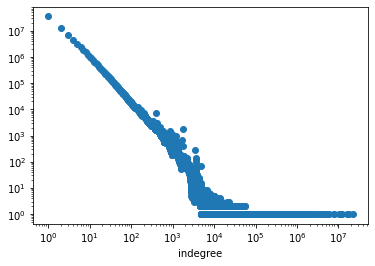

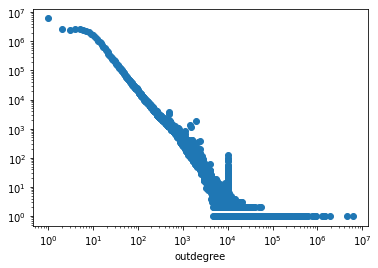

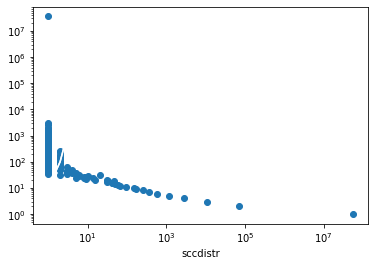

In [47]:
for df_pair in df_list:
    df = df_pair[0]
    metric = df_pair[1]
    plt.semilogy([1,10,100,1000,10000,100000,1000000], color='white')
    plt.semilogx([1,10,100,1000,10000,100000,1000000], color='white')
    if metric == "sccdistr":
        plt.scatter(df['frequency'], df.index) #sccdistr is formatteed as <value, frequency>
    else:
        plt.scatter(df.index, df['frequency'])
    plt.xlabel(metric)
    plt.show()